In [109]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [135]:
series = pd.read_csv('sine-wave.csv', header=None )

In [136]:
series.head()

,0
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402


In [137]:
series.shape

(5001, 1)

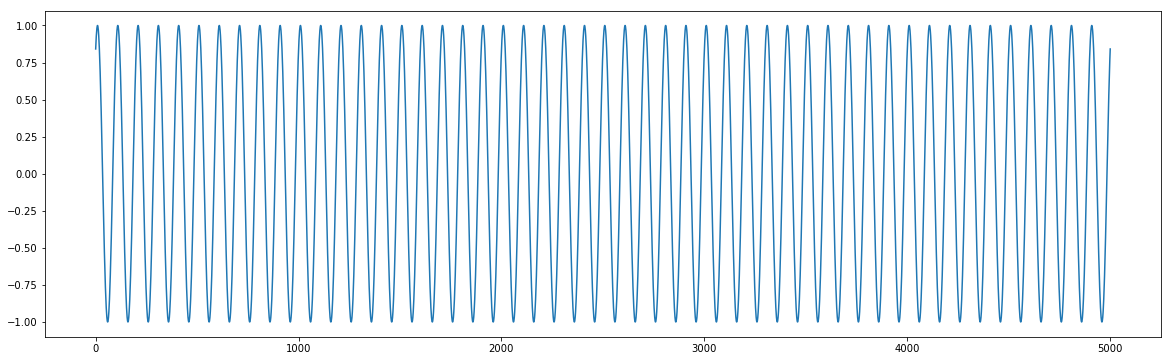

In [146]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

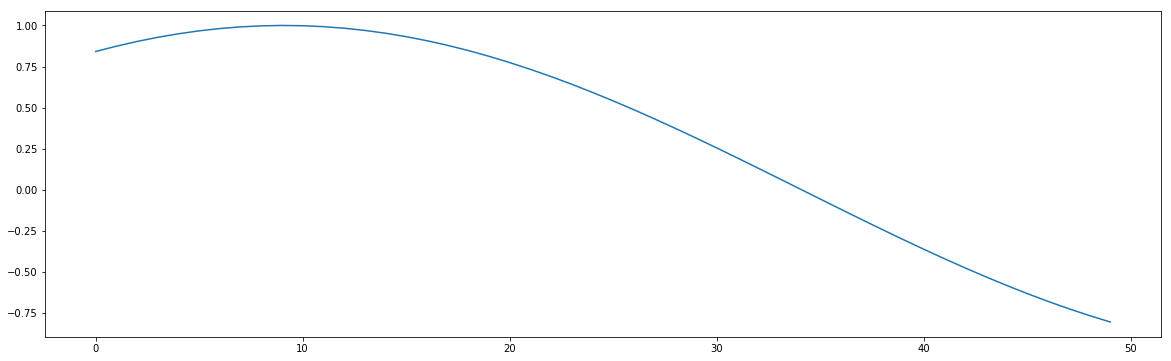

In [147]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:50])
pyplot.show()

In [112]:
# normalize features - 

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [113]:
window_size = 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [114]:
series.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.841483,0.873749,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,...,-0.420975,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483
1,0.873749,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,...,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749
2,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,...,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566
3,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,...,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822
4,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,...,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416


In [115]:
series.shape

(4951, 51)

In [116]:
nrow = round(0.8*series.shape[0])

In [118]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

In [119]:
from sklearn.utils import shuffle
train = shuffle(train)

In [120]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [121]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [122]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(3961, 50)

(3961,)

(990, 50)

(990,)

In [123]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [124]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(3961, 50, 1)

(3961,)

(990, 50, 1)

(990,)

In [125]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

C:\Users\kmsra_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(50, 1), return_sequences=True, units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 256)               314368    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [126]:
start = time.time()
model.fit(train_X,train_y,batch_size=512,nb_epoch=3,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

C:\Users\kmsra_000\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3564 samples, validate on 397 samples
Epoch 1/3
3564/3564 [==============================] - 36s - loss: 0.2418 - val_loss: 0.0543
Epoch 2/3
3564/3564 [==============================] - 33s - loss: 0.0362 - val_loss: 0.0087
Epoch 3/3
3564/3564 [==============================] - 33s - loss: 0.0209 - val_loss: 2.4824e-04


> Compilation Time :  107.14389872550964


In [127]:
# Doing a prediction on all the test data at once
preds = model.predict(test_X)

In [128]:
preds = scaler.inverse_transform(preds)

In [129]:
actuals = scaler.inverse_transform(test_y)
#actuals = test_y

C:\Users\kmsra_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [130]:
mean_squared_error(actuals,preds)

0.00023084381188612587

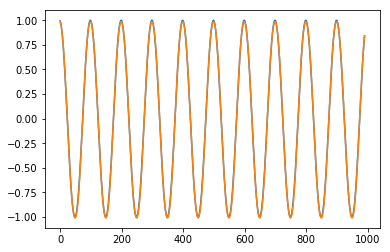

In [131]:
pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()

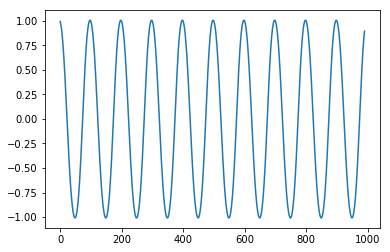

In [99]:
pyplot.plot(preds)
pyplot.show()

In [132]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    preds_moving = scaler.inverse_transform(preds_moving)
    
    return preds_moving
        

In [133]:
preds_moving = moving_test_window_preds(500)

C:\Users\kmsra_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


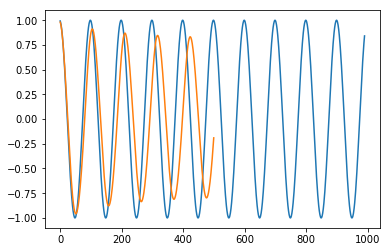

In [134]:
pyplot.plot(actuals)
pyplot.plot(preds_moving)
pyplot.show()